# Závěrečný úkol - porovnání algoritmů

Vyberte si 3 testovací funkce a porovnejte naprogramované algoritmy: __GA (vyberte si encoding), DE (všechny verze), PSO (všechny verze), SOMA (všechny verze)__

* 3 testovací funkce.
* Každou funkci budete optimalizovat každým algoritmem. Každý algoritmus bude optimalizovat každou funkci 11x, abychom dostali alespoň trochu relevantní statistiku.
* Řešené dimenze budou __10__ a __20__, takže to je v podstatě 6 funkcí (3 funkce x 2 dimenzionální nastavení).
* Každý běh bude zastaven po __3 000*D__ ohodnoceních účelové funkce, tedy 30 000 pro 10D a 60 000 pro 20D

Statistické vyhodnocení: Průměr, Std.Dev.,  Medián, Min. a Max. Dvě tabulky (jedna pro 10D, druhá pro 20D). V jedné tabulce tedy bude 5 sloupců (statistické údaje) a 3 (počet funkcí) * 10 (počet algoritmů) řádků.

__Bonus pro zajímavost__: Proveďte grafické srovnání průměrného průběhu (vývoje nejlepšího řešení) během optimalizace - 6 grafů (pro každou funkci zvlášť) a v každém grafu 10 linií (počet algoritmů). Pozor jenom aby seděla informace na ose x. Ne všechny algoritmy poběží stejný počet generací/iterací, takže by na ose x měl být spíš počet ohodnocení účelové funkce.

__POČÍTEJTE S TÍM, ŽE TO POBĚŽÍ DLOUHO! Takže doporučuju si výsledky exportovat v nějakém rozumném formátu, ať vám to nemusí běžet v kuse všechno.__

In [1]:
import numpy as np
import SharedUtils

# Evolucni algoritmy

In [2]:
import GeneticAlgorithm
import DifferentialEvolution
import PSO
import SOMA

# Nacteni ze souboru

In [1]:
LOAD_FROM_FILE = False

# Utility pro multi-procesove statisticke vyhodnoceni libovolne sady evolucnich algoritmu

In [4]:
from AlgorithmStatistics import *

# Trida pro zobrazeni statistickych vysledku

In [5]:
from StatisticsVisualization import *

# Tesovaci funkce

In [6]:
# meze [-float('inf'), float('inf')]
def sphere_function(x):
    return np.sum(x**2)

# meze [-5.12, 5.12]
def rastrigins_function(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# meze [-float('inf'), float('inf')]
def rosenbrock(x):
    sum_term = 0
    for i in range(len(x) - 1):
        sum_term += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
    return sum_term

# Generator nazvu

In [8]:
def N(alg, func, dim):
    if func == sphere_function:
        return f"{alg} Sphere {dim}D"
    elif func == rastrigins_function:
        return f"{alg} Rastrigins {dim}D"
    else:
        return f"{alg} Rosenbrock {dim}D"
    
def filter_10D(item):
    return item.endswith('10D')

def filter_20D(item):
    return item.endswith('20D')

def filter_sphere_10D(item):
    return item.endswith('Sphere 10D') 

def filter_sphere_20D(item):
    return item.endswith('Sphere 20D') 

def filter_rastrigins_10D(item):
    return item.endswith('Rastrigins 10D') 

def filter_rastrigins_20D(item):
    return item.endswith('Rastrigins 20D') 

def filter_rosenbrock_10D(item):
    return item.endswith('Rosenbrock 10D') 

def filter_rosenbrock_20D(item):
    return item.endswith('Rosenbrock 20D') 

# Vytvoreni a nastaveni tridy pro statisticke vyhodnoceni

In [9]:
algorithmStatistics = AlgorithmStatistics(repeat_count=11)

# Definice callbacku pro jednotlive algoritmy

In [11]:
# faktor maximalniho poctu generaci: pocet = D * MAX_GEN_D_MUL 
MAX_GEN_D_MUL = 3000

# GA

def callback_GA(D, obj_func, bounds):
    pop = GeneticAlgorithm.Bin_Population([])
    ga = GeneticAlgorithm.GeneticAlgorithm(pop, 0.1, 'rank', 0.01, D * MAX_GEN_D_MUL)
    pop.random_init(20, 32, D, obj_func, GeneticAlgorithm.REPRESENTATION_TYPE_BCD, bounds)
    return ga.run()

# DE

def callback_DE_RAND(D, obj_func, bounds):
    pop1 = DifferentialEvolution.DE_Population(
        type=DifferentialEvolution.DE_TYPE_RAND, dimension=D, CR=0.8, F=0.5)
    pop1.create_population(population_size=20, bounds=bounds)
    pop1.set_fitness_function(obj_func)
    return pop1.run_evolution(D * MAX_GEN_D_MUL)


def callback_DE_BEST(D, obj_func, bounds):
    pop1 = DifferentialEvolution.DE_Population(
        type=DifferentialEvolution.DE_TYPE_BEST, dimension=D, CR=0.8, F=0.5)
    pop1.create_population(population_size=20, bounds=bounds)
    pop1.set_fitness_function(obj_func)
    return pop1.run_evolution(D * MAX_GEN_D_MUL)


def callback_DE_JDE(D, obj_func, bounds):
    pop1 = DifferentialEvolution.DE_Population(
        type=DifferentialEvolution.DE_TYPE_JDE, dimension=D, CR=0.8, F=0.5)
    pop1.create_population(population_size=20, bounds=bounds)
    pop1.set_fitness_function(obj_func)
    return pop1.run_evolution(D * MAX_GEN_D_MUL)


def callback_DE_EPSDE(D, obj_func, bounds):
    pop1 = DifferentialEvolution.DE_Population(
        type=DifferentialEvolution.DE_TYPE_EPSDE, dimension=D, CR=0.8, F=0.5)
    pop1.create_population(population_size=20, bounds=bounds)
    pop1.set_fitness_function(obj_func)
    return pop1.run_evolution(D * MAX_GEN_D_MUL)

# PSO


def callback_PSO_GLOBAL_LINEAR(D, obj_func, bounds):
    xRange = SharedUtils.Range(bounds[0], bounds[1])
    vmax = 0.2 * xRange.size()
    ps = PSO.ParticleSwarm(dim=D, nparticles=20, vmax=vmax,
                           range=xRange, topology=PSO.PS_TOPOLOGY_GLOBAL)
    pso = PSO.PSO(p_swarm=ps, obj_func=obj_func, max_iter=D *
                  MAX_GEN_D_MUL, w_func=PSO.w_func_linear, c1=2.0, c2=2.0)
    return pso.optimize()


def callback_PSO_GLOBAL_CONST(D, obj_func, bounds):
    xRange = SharedUtils.Range(bounds[0], bounds[1])
    vmax = 0.2 * xRange.size()
    ps = PSO.ParticleSwarm(dim=D, nparticles=20, vmax=vmax,
                           range=xRange, topology=PSO.PS_TOPOLOGY_GLOBAL)
    pso = PSO.PSO(p_swarm=ps, obj_func=obj_func, max_iter=D * MAX_GEN_D_MUL,
                  w_func=PSO.w_func_constant_07, c1=1.49618, c2=1.49618)
    return pso.optimize()


def callback_PSO_RING(D, obj_func, bounds):
    xRange = SharedUtils.Range(bounds[0], bounds[1])
    vmax = 0.2 * xRange.size()
    ps = PSO.ParticleSwarm(dim=D, nparticles=20, vmax=vmax,
                           range=xRange, topology=PSO.PS_TOPOLOGY_RING)
    ps.setProperty("RING_SIZE", 2)
    pso = PSO.PSO(p_swarm=ps, obj_func=obj_func, max_iter=D * MAX_GEN_D_MUL,
                  w_func=PSO.w_func_constant_06, c1=1.49618, c2=1.49618)
    return pso.optimize()

# SOMA

def callback_SOMA_ALL_TO_ONE(D, obj_func, bounds):
    xRange = SharedUtils.Range(bounds[0], bounds[1])
    pop1 = SOMA.SOMA_Population(dim=D, nindividual=20, range=xRange)
    soma1 = SOMA.SOMA(population=pop1)
    soma1.set_obj_func(obj_func)
    return soma1.optimize(
        max_migrations=D * MAX_GEN_D_MUL,
        prt=0.3,
        step=0.22,
        path_len=3.0,
        migration_type=SOMA.MIGRATION_ALL_TO_ONE)

def callback_SOMA_ALL_TO_ALL(D, obj_func, bounds):
    xRange = SharedUtils.Range(bounds[0], bounds[1])
    # 8 -> 8 * 7 - 1 = 55
    pop1 = SOMA.SOMA_Population(dim=D, nindividual=5, range=xRange)
    soma1 = SOMA.SOMA(population=pop1)
    soma1.set_obj_func(obj_func)
    return soma1.optimize(
        max_migrations=D * MAX_GEN_D_MUL,
        prt=0.3,
        step=0.22,
        path_len=3.0,
        migration_type=SOMA.MIGRATION_ALL_TO_ALL)

# Vytvoreni workeru pro vsechny poznosti testovanych algoritmu

In [12]:
name_list = []
for dim in [10, 20]:
    for func, bounds in [[sphere_function, [-10.0, 10.0]], [rastrigins_function, [-5.12, 5.12]], [rosenbrock, [-10.0, 10.0]]]:
        # GA
        name_list.append(N("GA", func, dim))
        algorithmStatistics.addWorker(N("GA", func, dim), callback_GA, Args(dim, func, bounds))

        # DE
        name_list.append(N("DE-RAND", func, dim))
        algorithmStatistics.addWorker(N("DE-RAND", func, dim), callback_DE_RAND, Args(dim, func, bounds))

        name_list.append(N("DE-BEST", func, dim))
        algorithmStatistics.addWorker(N("DE-BEST", func, dim), callback_DE_BEST, Args(dim, func, bounds))

        name_list.append(N("DE-JDE", func, dim))
        algorithmStatistics.addWorker(N("DE-JDE", func, dim), callback_DE_JDE, Args(dim, func, bounds))

        name_list.append(N("DE-EPSDE", func, dim))
        algorithmStatistics.addWorker(N("DE-EPSDE", func, dim), callback_DE_EPSDE, Args(dim, func, bounds))

        # PSO
        name_list.append(N("PSO-GLOBAL-LINEAR", func, dim))
        algorithmStatistics.addWorker(N("PSO-GLOBAL-LINEAR", func, dim), callback_PSO_GLOBAL_LINEAR, Args(dim, func, bounds))

        name_list.append(N("PSO-GLOBAL-CONST", func, dim))
        algorithmStatistics.addWorker(N("PSO-GLOBAL-CONST", func, dim), callback_PSO_GLOBAL_CONST, Args(dim, func, bounds))

        name_list.append(N("PSO-RING", func, dim))
        algorithmStatistics.addWorker(N("PSO-RING", func, dim), callback_PSO_RING, Args(dim, func, bounds))

        # SOMA
        name_list.append(N("SOMA-A2A", func, dim))
        algorithmStatistics.addWorker(N("SOMA-A2A", func, dim), callback_SOMA_ALL_TO_ALL, Args(dim, func, bounds))

        name_list.append(N("SOMA-A2O", func, dim))
        algorithmStatistics.addWorker(N("SOMA-A2O", func, dim), callback_SOMA_ALL_TO_ONE, Args(dim, func, bounds))
print(name_list)

['GA Sphere 10D', 'DE-RAND Sphere 10D', 'DE-BEST Sphere 10D', 'DE-JDE Sphere 10D', 'DE-EPSDE Sphere 10D', 'PSO-GLOBAL-LINEAR Sphere 10D', 'PSO-GLOBAL-CONST Sphere 10D', 'PSO-RING Sphere 10D', 'SOMA-A2A Sphere 10D', 'SOMA-A2O Sphere 10D', 'GA Rastrigins 10D', 'DE-RAND Rastrigins 10D', 'DE-BEST Rastrigins 10D', 'DE-JDE Rastrigins 10D', 'DE-EPSDE Rastrigins 10D', 'PSO-GLOBAL-LINEAR Rastrigins 10D', 'PSO-GLOBAL-CONST Rastrigins 10D', 'PSO-RING Rastrigins 10D', 'SOMA-A2A Rastrigins 10D', 'SOMA-A2O Rastrigins 10D', 'GA Rosenbrock 10D', 'DE-RAND Rosenbrock 10D', 'DE-BEST Rosenbrock 10D', 'DE-JDE Rosenbrock 10D', 'DE-EPSDE Rosenbrock 10D', 'PSO-GLOBAL-LINEAR Rosenbrock 10D', 'PSO-GLOBAL-CONST Rosenbrock 10D', 'PSO-RING Rosenbrock 10D', 'SOMA-A2A Rosenbrock 10D', 'SOMA-A2O Rosenbrock 10D', 'GA Sphere 20D', 'DE-RAND Sphere 20D', 'DE-BEST Sphere 20D', 'DE-JDE Sphere 20D', 'DE-EPSDE Sphere 20D', 'PSO-GLOBAL-LINEAR Sphere 20D', 'PSO-GLOBAL-CONST Sphere 20D', 'PSO-RING Sphere 20D', 'SOMA-A2A Sphere 

# Spusteni statistickeho vyhodnoceni

In [10]:
if not LOAD_FROM_FILE:
    algorithmStatistics.runAllWorkers()

[Starting all workers]
Worker [GA Sphere 10D] is running now!
Worker [DE-BEST Sphere 10D] is running now!
Worker [DE-EPSDE Sphere 10D] is running now!
Worker [DE-RAND Sphere 10D] is running now!
Worker [PSO-GLOBAL-LINEAR Sphere 10D] is running now!
Worker [DE-JDE Sphere 10D] is running now!
Worker [PSO-GLOBAL-CONST Sphere 10D] is running now!
Worker [SOMA-A2A Sphere 10D] is running now!
Worker [PSO-RING Sphere 10D] is running now!
Worker [GA Rastrigins 10D] is running now!
Worker [SOMA-A2O Sphere 10D] is running now!
Worker [DE-RAND Rastrigins 10D] is running now!
Worker [DE-JDE Rastrigins 10D] is running now!
Worker [PSO-GLOBAL-LINEAR Rastrigins 10D] is running now!
Worker [DE-BEST Rastrigins 10D] is running now!
Worker [DE-EPSDE Rastrigins 10D] is running now!
Worker [PSO-GLOBAL-CONST Sphere 10D] progress 1/11 [Time: 28.6 s | Remaining: 300.4 s]
Worker [PSO-GLOBAL-LINEAR Sphere 10D] progress 1/11 [Time: 29.0 s | Remaining: 304.2 s]
Worker [PSO-RING Sphere 10D] progress 1/11 [Time: 35

In [55]:
if not LOAD_FROM_FILE:
    for w in algorithmStatistics.getWorkers():
        res = w.getResults()
        if res is not None:
            res.save_to_csv("results/" + w.name + ".csv")

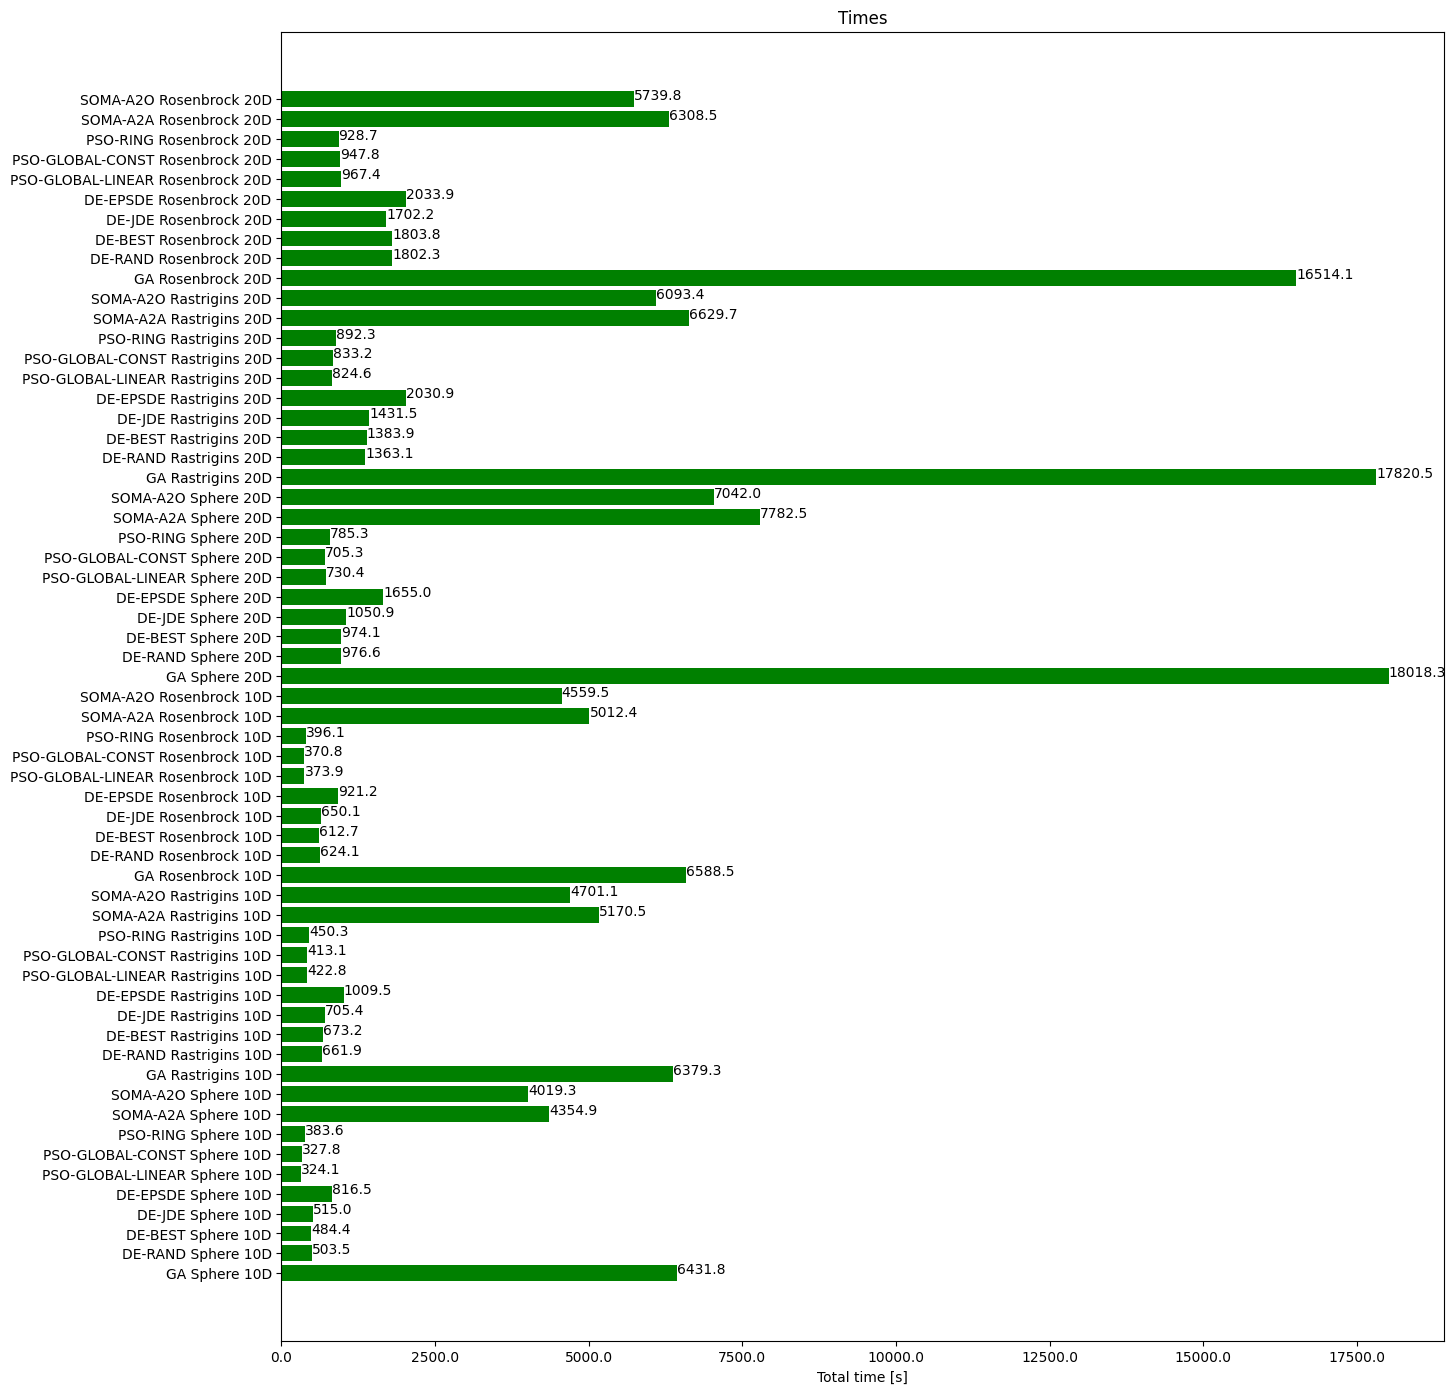

Total time: 49.06373795767625 h | Real time: 5.983333333333333 h


In [58]:
if not LOAD_FROM_FILE:
    algorithmStatistics.showTime()

    total_time = 0.0
    for w in algorithmStatistics.getWorkers():
        total_time += w.getResults().total_time
    print(f"Total time: {total_time/ 3600.0} h | Real time: {359 / 60.0} h")    

In [13]:
if LOAD_FROM_FILE:
    for w in algorithmStatistics.getWorkers():
        w.getResults().load_from_csv("results/" + w.name + ".csv")
        print(f"{w.name} loaded from file!")

GA Sphere 10D loaded from file!
DE-RAND Sphere 10D loaded from file!
DE-BEST Sphere 10D loaded from file!
DE-JDE Sphere 10D loaded from file!
DE-EPSDE Sphere 10D loaded from file!
PSO-GLOBAL-LINEAR Sphere 10D loaded from file!
PSO-GLOBAL-CONST Sphere 10D loaded from file!
PSO-RING Sphere 10D loaded from file!
SOMA-A2A Sphere 10D loaded from file!
SOMA-A2O Sphere 10D loaded from file!
GA Rastrigins 10D loaded from file!
DE-RAND Rastrigins 10D loaded from file!
DE-BEST Rastrigins 10D loaded from file!
DE-JDE Rastrigins 10D loaded from file!
DE-EPSDE Rastrigins 10D loaded from file!
PSO-GLOBAL-LINEAR Rastrigins 10D loaded from file!
PSO-GLOBAL-CONST Rastrigins 10D loaded from file!
PSO-RING Rastrigins 10D loaded from file!
SOMA-A2A Rastrigins 10D loaded from file!
SOMA-A2O Rastrigins 10D loaded from file!
GA Rosenbrock 10D loaded from file!
DE-RAND Rosenbrock 10D loaded from file!
DE-BEST Rosenbrock 10D loaded from file!
DE-JDE Rosenbrock 10D loaded from file!
DE-EPSDE Rosenbrock 10D load

# Trida pro prezentaci statistickych vysledku

In [14]:
statisticsVisualization = StatisticsVisualization(stat=algorithmStatistics)

# Vysledky pro 10D

In [15]:
statisticsVisualization.showTableFor(names=list(filter(filter_10D, name_list)))

+----------------------------------+-----------------------+------------------------+-------------------------+-----------------------+-----------------------+
|               Name               |        Average        |        Std.Dev.        |          Median         |          Min          |          Max          |
+----------------------------------+-----------------------+------------------------+-------------------------+-----------------------+-----------------------+
|          GA Sphere 10D           |          0.0          |          0.0           |           0.0           |          0.0          |          0.0          |
|        DE-RAND Sphere 10D        | 7.314608581008781e-25 | 2.3130823308599997e-24 | 2.2756679402759013e-145 |          0.0          | 8.046069439109659e-24 |
|        DE-BEST Sphere 10D        |  0.42624593715507897  |   0.7053438551907257   |   0.15813172413146787   | 0.0006258101207431098 |   2.564741540955652   |
|        DE-JDE Sphere 10D         |    

# Vysledky pro 20D

In [16]:
statisticsVisualization.showTableFor(names=list(filter(filter_20D, name_list)))

+----------------------------------+------------------------+-----------------------+------------------------+------------------------+-----------------------+
|               Name               |        Average         |        Std.Dev.       |         Median         |          Min           |          Max          |
+----------------------------------+------------------------+-----------------------+------------------------+------------------------+-----------------------+
|          GA Sphere 20D           |   7.995717349199998    |   23.273164322808356  |  0.04013384000000001   | 0.00010904649999999998 |   81.49861076689999   |
|        DE-RAND Sphere 20D        | 2.2935715320832473e-06 | 4.030465791920312e-06 | 1.5967719557147333e-07 | 2.175651777156587e-33  | 1.378038453166512e-05 |
|        DE-BEST Sphere 20D        |    19.380375987917     |   7.994584522753182   |   18.69516779466506    |   7.9202351053007245   |   38.00546454506703   |
|        DE-JDE Sphere 20D         |    

# Grafy pro jednotlive funkce

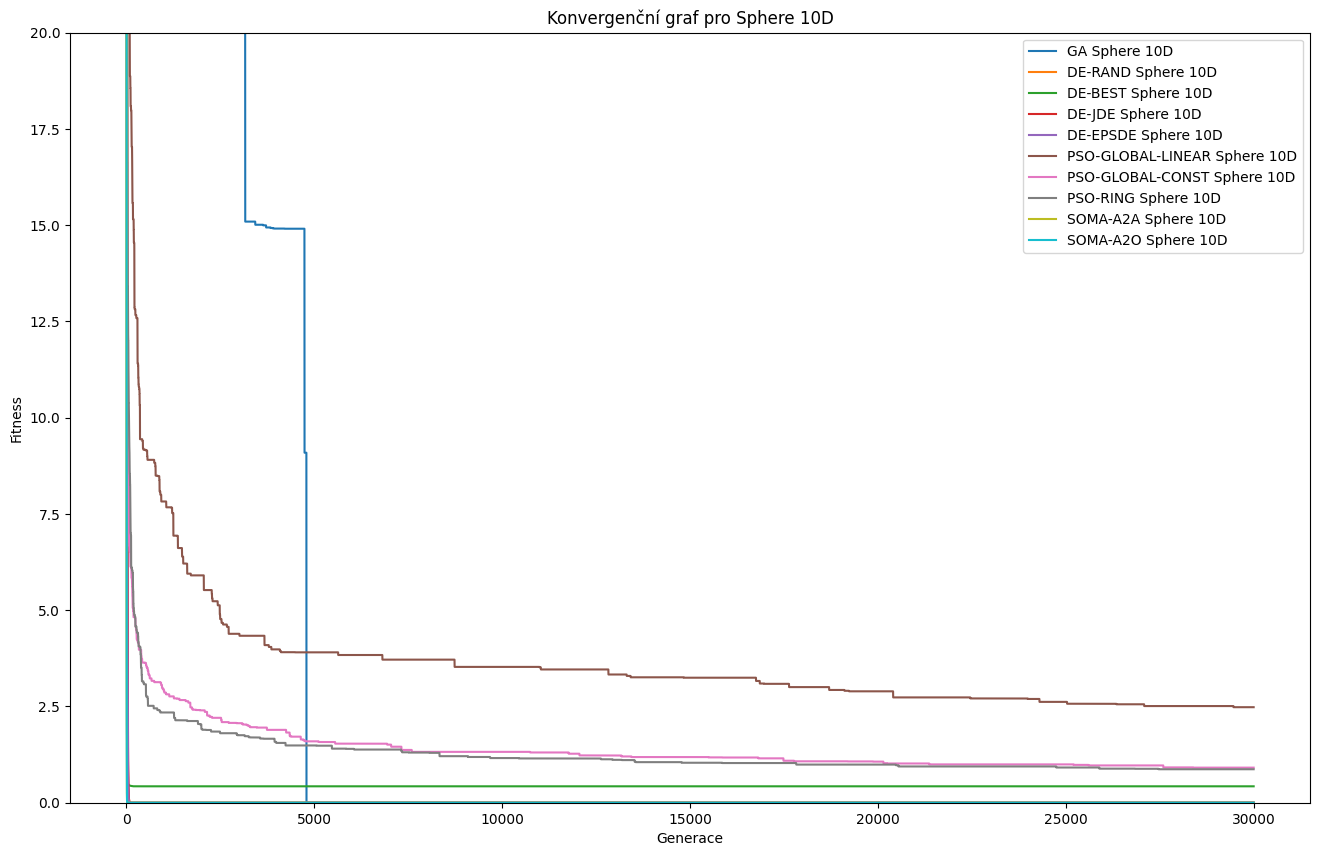

changed


In [21]:
statisticsVisualization.showGraphFor(title="Sphere 10D", names=list(filter(filter_sphere_10D, name_list)), max_y_value=20)

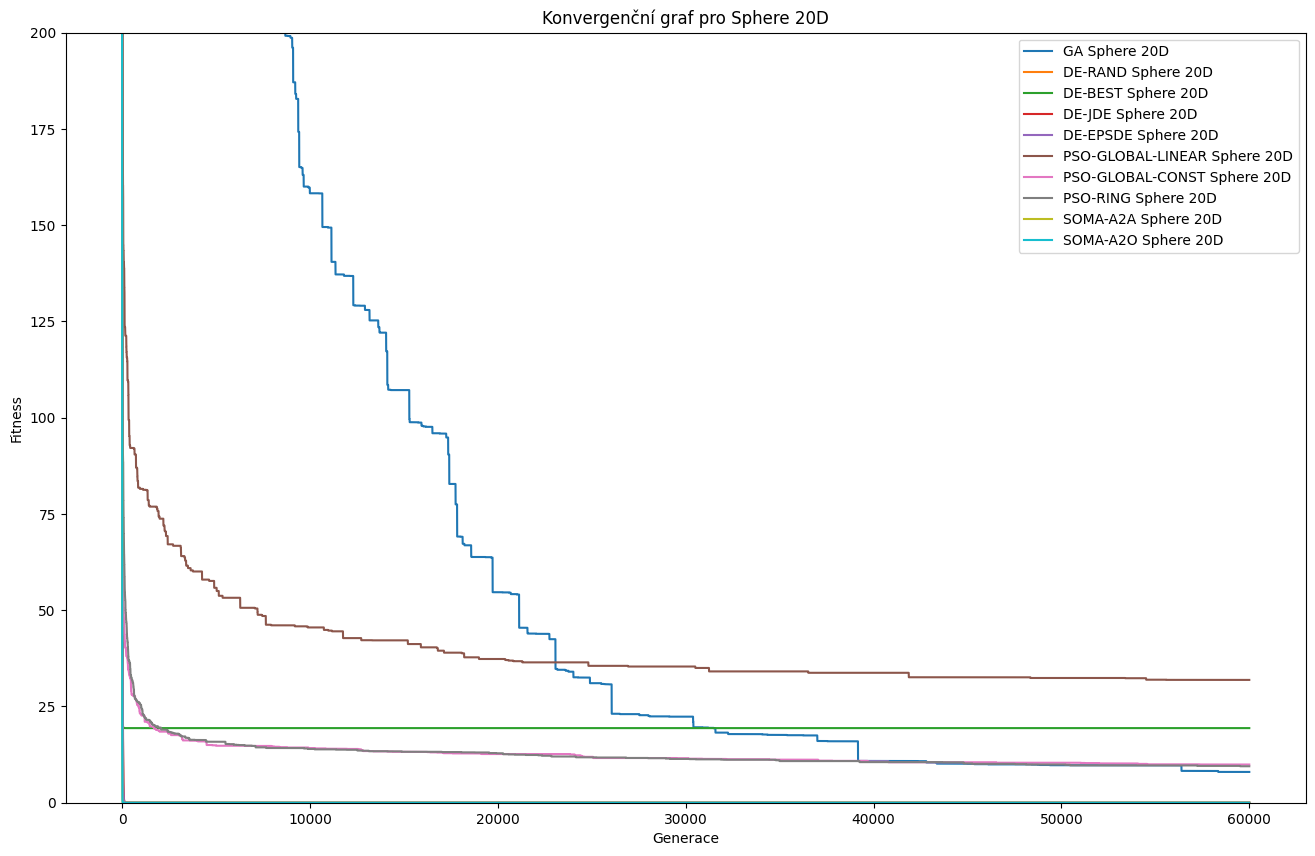

changed


In [22]:
statisticsVisualization.showGraphFor(title="Sphere 20D", names=list(filter(filter_sphere_20D, name_list)), max_y_value=200)

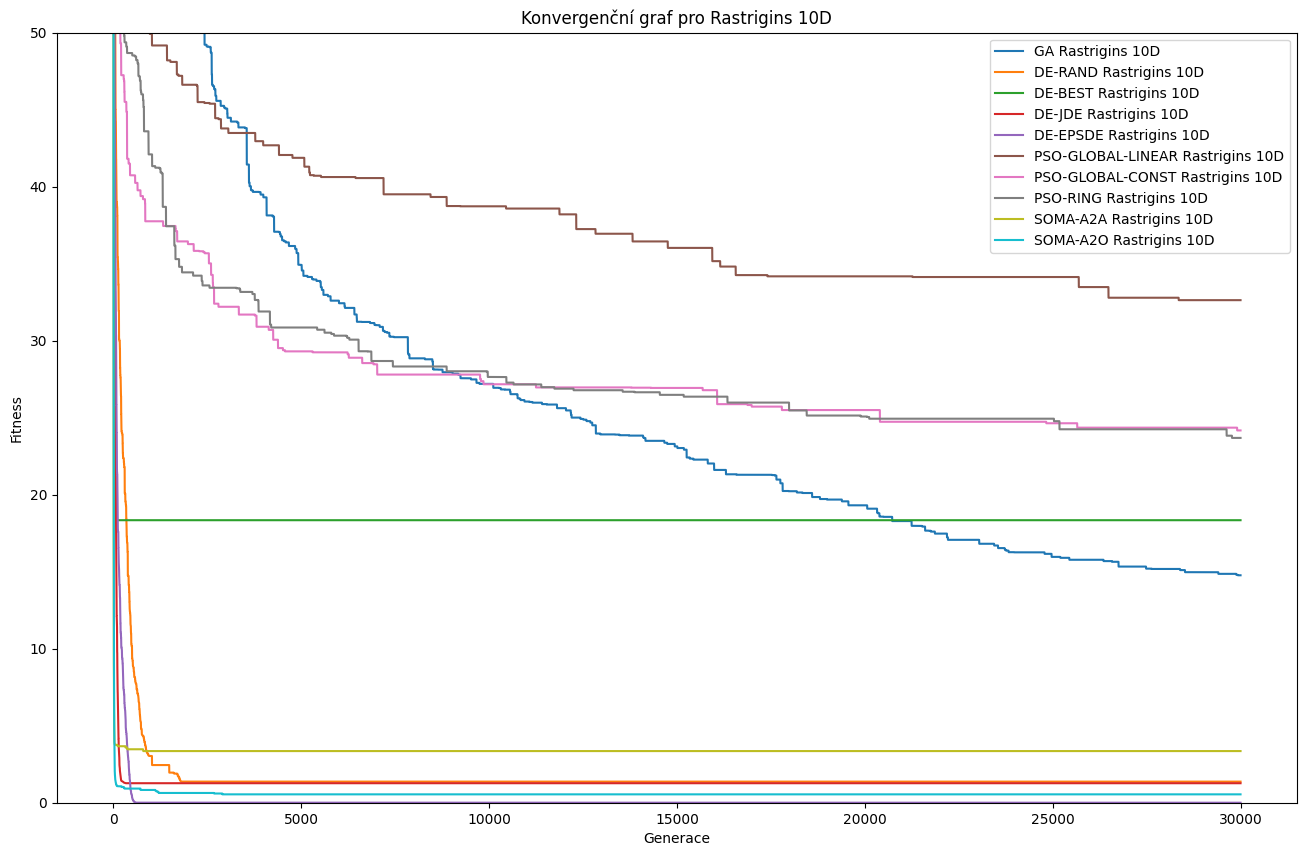

changed


In [25]:
statisticsVisualization.showGraphFor(title="Rastrigins 10D", names=list(filter(filter_rastrigins_10D, name_list)), max_y_value=50)

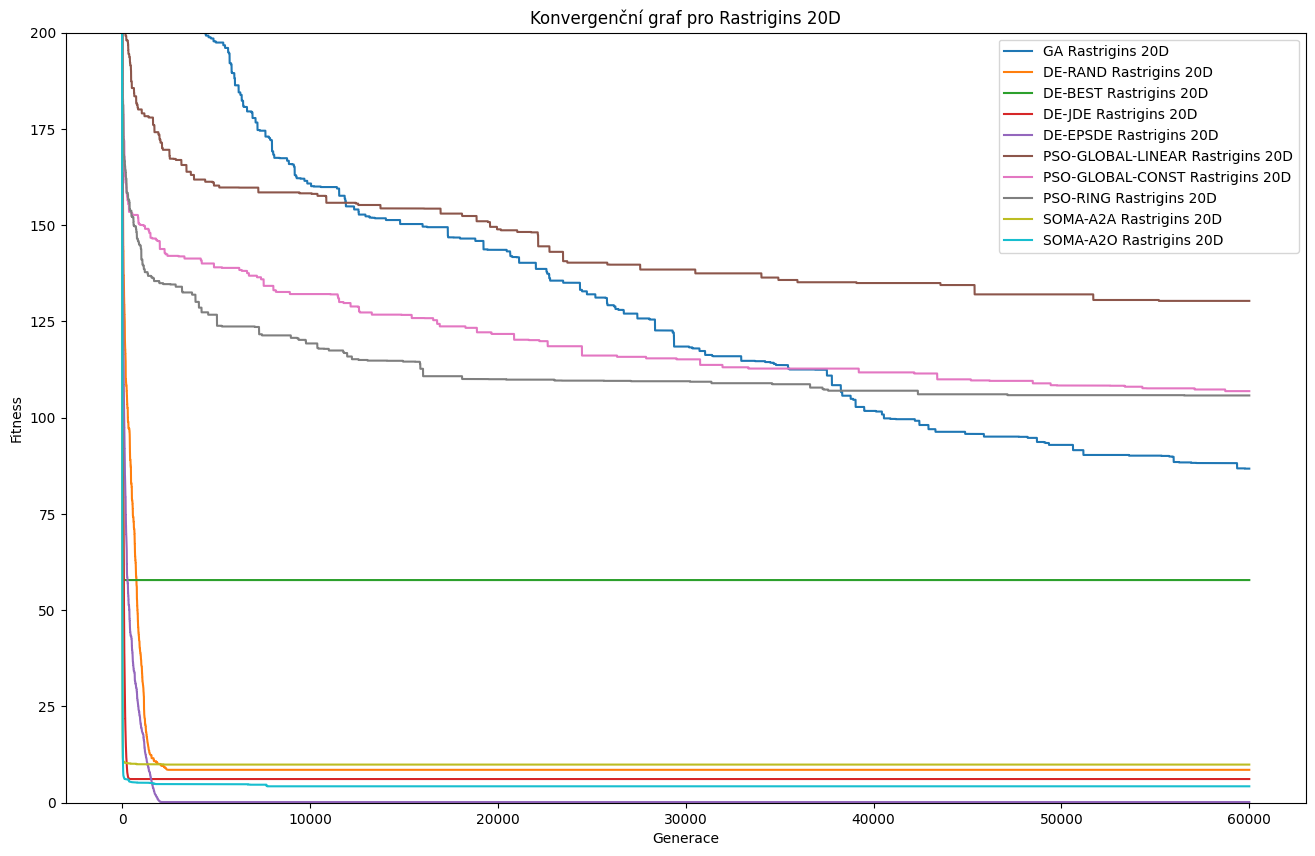

changed


In [26]:
statisticsVisualization.showGraphFor(title="Rastrigins 20D", names=list(filter(filter_rastrigins_20D, name_list)), max_y_value=200)

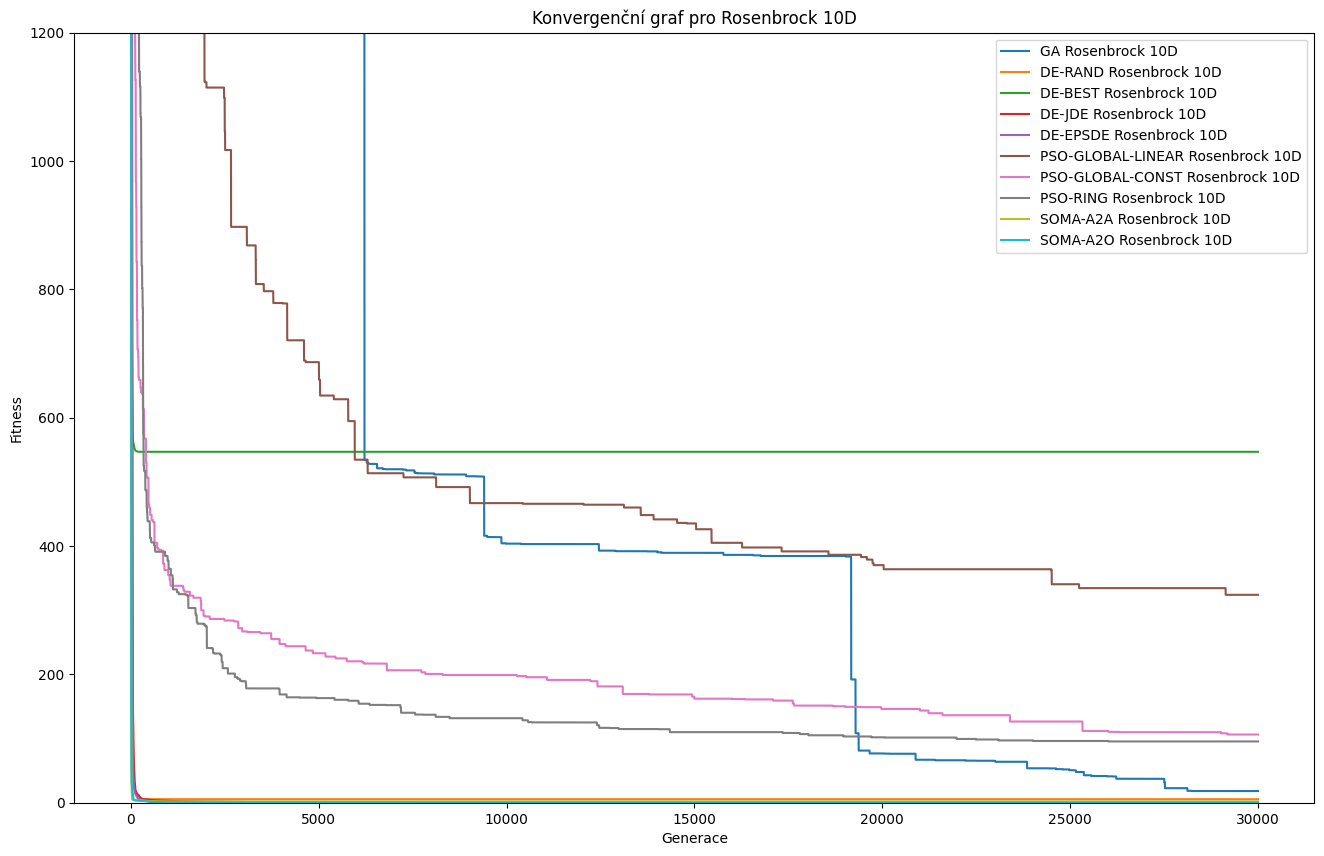

changed


In [30]:
statisticsVisualization.showGraphFor(title="Rosenbrock 10D", names=list(filter(filter_rosenbrock_10D, name_list)), max_y_value=1200)

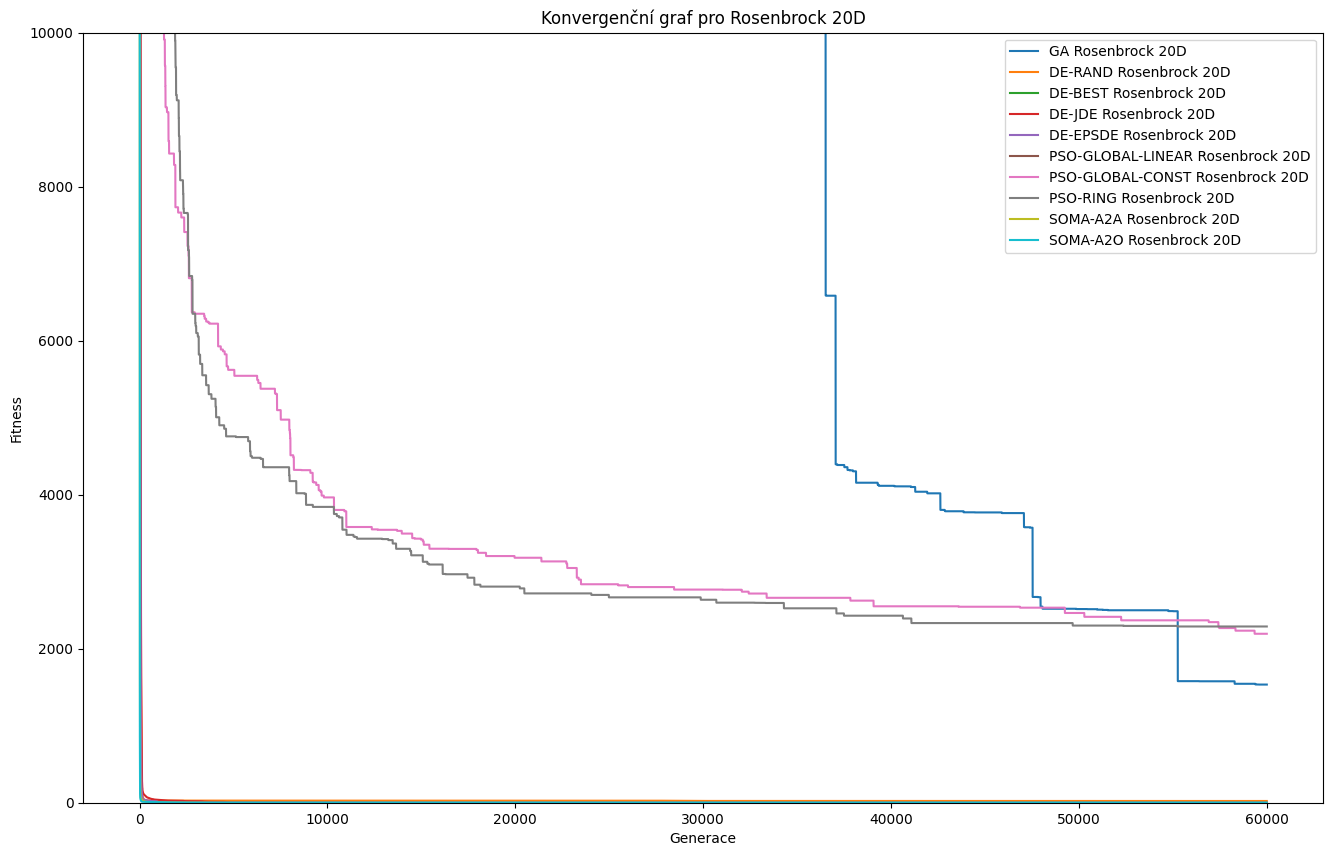

changed


In [35]:
statisticsVisualization.showGraphFor(title="Rosenbrock 20D", names=list(filter(filter_rosenbrock_20D, name_list)), max_y_value=10000)

# Závěr

Pro všechny evoluční algoritmy jsem volil stejnou velikost populace, aby bylo možné relevantně porovnat výsledné charakteristiky všech algoritmů. Jedinou vyjímkou byl algoritmus SOMA verze ALL-TO-ALL, u které počet jedincu byl snižen, aby byl srovnatelný s verzí SOMA ALL-TO-ONE. 

Z evolučních algoritmů se globálně nejlépe vedly všechny varianty algoritmu SOMA. Jako jedené z málá v některých případech dosahovaly 0.0 ve všech statistických charakteristikách a tak dokázal vždy najít přesně globální minimum ve všech z 11 opakování algoritmu. Taktéž algoritmy PSO dosahovaly dobrých výsledků, ale v některých připadech naopak výsledky neopadly uplně ideálně. Algoritmy založené na diferenciální evoluci dosahovaly lepších globálně výsledků než PSO, ale naopak byly více časově náročné. 

Absolutně nejhorších výsledků ze všech dosáhl genetický algoritmus. Nejenže v některých případech se ani zdaleka nepřiblížil globálnímu minimu, ale hlavně je problém v efektivitě. Jelikož je každý jedinec reprezentován více binárními řetězci tak vždy bylo nutné je převádět na reálné číslo a zpět, což způsobovalo opravdu výrazné zpoždění oprotí ostatním algoritmů,.